In [3]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

In [4]:
import pandas as pd
import numpy as np
import time
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()

print(iris.keys())
print("Data Shapes - Features {} Target: {} ".format(iris.data.shape,iris.target.shape))
print("Iris labels are :",pd.unique(iris.target))
print(iris.feature_names)

x_train, x_test ,y_train, y_test  =train_test_split(iris.data,iris.target,test_size = .33)


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
Data Shapes - Features (150, 4) Target: (150,) 
Iris labels are : [0 1 2]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(fit_intercept = False)
lr_model.fit(x_train, y_train)
print("Matrix is: \n{}\n".format(lr_model.coef_))
print("Accuracy is :",sk.metrics.accuracy_score(y_test, lr_model.predict(x_test)))

#print(vars(lr_model).keys())



Matrix is: 
[[ 0.67809169  1.5222555  -2.06468758 -0.94059062]
 [ 0.42129027 -0.02073601  0.06986399 -0.88364382]
 [-1.09938196 -1.50151949  1.99482359  1.82423444]]

Accuracy is : 0.98


In [7]:
import statsmodels.api as sm
binary_y = iris.target
binary_y[binary_y==2] = 1
print(pd.unique(binary_y),binary_y.shape)

logit = sm.Logit(binary_y,sm.add_constant(iris.data[:,:1], prepend = True))
sm_coefs = logit.fit()
print(sm_coefs.summary())



[0 1] (150,)
Optimization terminated successfully.
         Current function value: 0.239455
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  150
Model:                          Logit   Df Residuals:                      148
Method:                           MLE   Df Model:                            1
Date:                Thu, 27 May 2021   Pseudo R-squ.:                  0.6238
Time:                        21:00:40   Log-Likelihood:                -35.918
converged:                       True   LL-Null:                       -95.477
Covariance Type:            nonrobust   LLR p-value:                 9.869e-28
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -27.8285      4.828     -5.765      0.000     -37.290     -18.367
x1             5

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree = decision_tree.fit(x_train, y_train)
r = export_text(decision_tree, feature_names=iris['feature_names'])
print(r)

print("Accuracy is :",sk.metrics.accuracy_score(y_test, decision_tree.predict(x_test)))


|--- petal width (cm) <= 0.75
|   |--- class: 0
|--- petal width (cm) >  0.75
|   |--- petal width (cm) <= 1.65
|   |   |--- class: 1
|   |--- petal width (cm) >  1.65
|   |   |--- class: 2

Accuracy is : 0.96


In [9]:
from sklearn.ensemble import RandomForestClassifier
clf= RandomForestClassifier(n_estimators=50,max_depth=2,max_features=.5)
clf = clf.fit(x_train, y_train)
#print(vars(clf).keys())

print("Accuracy is :",sk.metrics.accuracy_score(y_test, clf.predict(x_test)))

Accuracy is : 0.98


In [10]:
from sklearn.ensemble import GradientBoostingClassifier
gbt = GradientBoostingClassifier(learning_rate =0.05,n_estimators=50,max_depth=2,min_samples_split=5,max_features=0.5)
gbt = gbt.fit(x_train, y_train)
print("Accuracy is :",sk.metrics.accuracy_score(y_test, gbt.predict(x_test)))

Accuracy is : 0.98


In [23]:
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import Callback
from IPython.display import clear_output

            
def update_progress(progress):
    bar_length = 30
    if isinstance(progress, int):
        progress = float(progress)
    if not isinstance(progress, float):
        progress = 0
    if progress < 0:
        progress = 0
    if progress >= 1:
        progress = 1

    block = int(round(bar_length * progress))

    clear_output(wait = True)
    text = "Progress: [{0}] {1:.1f}%".format( "#" * block + "-" * (bar_length - block), progress * 100)
    print(text)
    
class progress_bar(Callback):
        
        def on_epoch_end(self, epoch, logs=None):
            update_progress((epoch+1)/500)

progress = progress_bar()
 

In [24]:
           
nn_model = Sequential([
        Input(shape =(4,)),
        Dense(128,activation='relu'),
        Dense(128,activation='relu'),
        Dense(3,activation='softmax')
    ])

nn_model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=["sparse_categorical_accuracy"])
history= nn_model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=500,callbacks=[progress], verbose=False)

Progress: [##############################] 100.0%


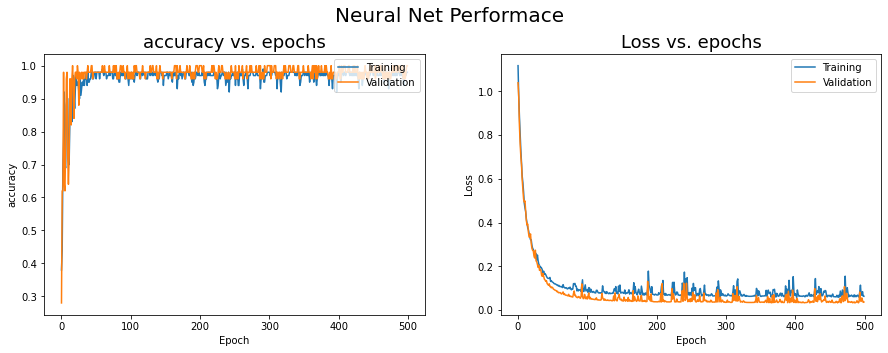

In [25]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
fig.suptitle('Neural Net Performace',fontsize=20)

fig.subplots_adjust(top=0.85)

ax[0].plot(history.history['sparse_categorical_accuracy'])
ax[0].plot(history.history['val_sparse_categorical_accuracy'])
ax[0].set_title('accuracy vs. epochs',fontsize=18)
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Training', 'Validation'], loc='upper right')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Loss vs. epochs',fontsize=18)
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Training', 'Validation'], loc='upper right')

plt.show()

In [26]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train)
print("Accuracy is :",sk.metrics.accuracy_score(y_test, gnb.predict(x_test)))

Accuracy is : 0.98


In [28]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='adam', activation = 'relu',hidden_layer_sizes=(128,128),max_iter=500)

mlp = mlp.fit(x_train, y_train)
print("Accuracy is :",sk.metrics.accuracy_score(y_test, mlp.predict(x_test)))

Accuracy is : 1.0


In [38]:
for x in ["{:3.0f} {:3.0f} {:3.0f}".format(*i*100) for i in mlp.predict_proba(x_test)]:
    print(x)

  0 100   0
100   0   0
  0 100   0
  0  54  46
  0   6  94
100   0   0
  0   0 100
100   0   0
  0 100   0
  0  67  33
  0 100   0
  0 100   0
  0   0 100
  0   0 100
  0 100   0
  0 100   0
100   0   0
  0 100   0
100   0   0
  0   0 100
100   0   0
100   0   0
  0  25  75
100   0   0
  0 100   0
  0 100   0
  0 100   0
  0   0 100
  0   0 100
  0 100   0
  0 100   0
  0  15  85
  0  99   1
100   0   0
  0   1  99
  0   0 100
100   0   0
100   0   0
100   0   0
  1  99   0
  0   0 100
  0 100   0
100   0   0
100   0   0
100   0   0
100   0   0
  0   0 100
  0   0 100
100   0   0
  0 100   0
